In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import numpy as np

### Function to read an image on openCV

In [8]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(9, 9))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

### Reading partially-empty lot image and applying gausian blur

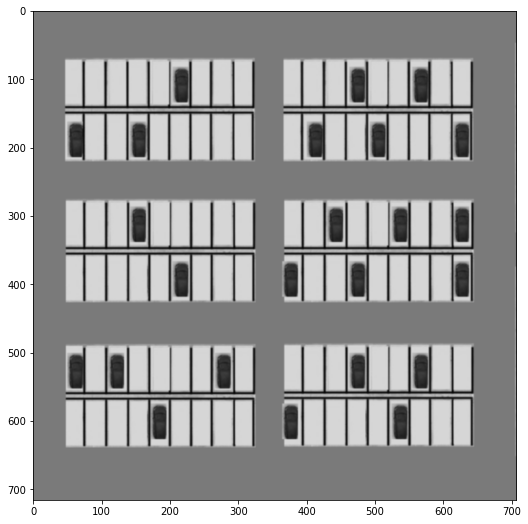

In [9]:
img=cv2.imread("half-full-parking-lot.png",0)
blurImg = cv2.GaussianBlur(img, (3,3), 0)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(blurImg,cv2.COLOR_BGR2RGB))
plt.show()

### Edging the parking lot image using Canny edges

#### 7 X 7 Kernel

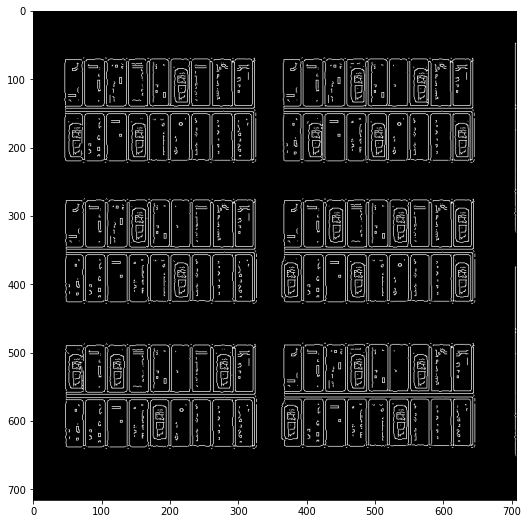

In [10]:
edged = cv2.Canny(blurImg,50,150,apertureSize=7)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

### Reading empty lot image and applying gausian blur

#### 5 X 5 Kernel

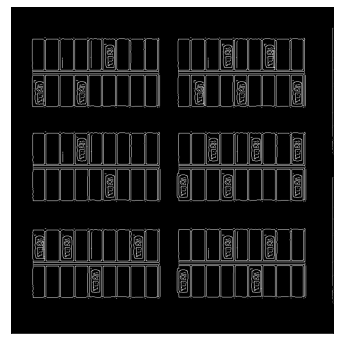

In [11]:
edged = cv2.Canny(blurImg,50,150,apertureSize=5)
show_images([edged])

#### 3 X 3 Kernel 

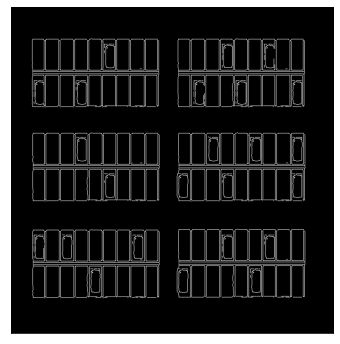

In [12]:
edged = cv2.Canny(blurImg,50,150,apertureSize=3)
show_images([edged])

### Applying the same processing techhiques on empty and full images

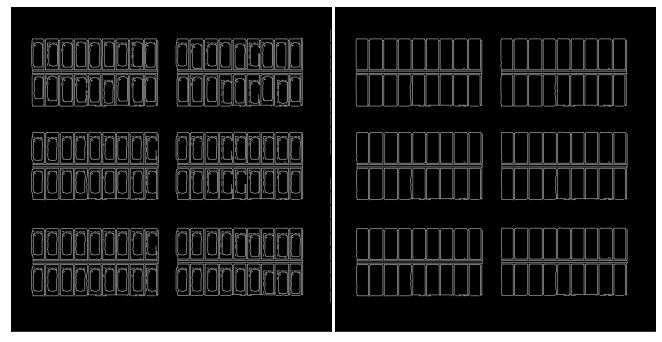

In [13]:
img=cv2.imread("full-parking-lot.png",0)
blurImg = cv2.GaussianBlur(img, (3,3), 0)
Fulledged = cv2.Canny(blurImg,50,150,apertureSize=3)
img=cv2.imread("empty-parking-lot.png",0)
blurImg = cv2.GaussianBlur(img, (3,3), 0)
Emptyedged = cv2.Canny(blurImg,50,150,apertureSize=3)
show_images([Fulledged,Emptyedged])

### Differential Image

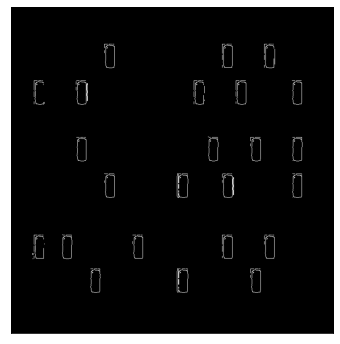

In [14]:
diff = cv2.absdiff(edged, Emptyedged)
show_images([diff])

### Testing the model

### Trainning model

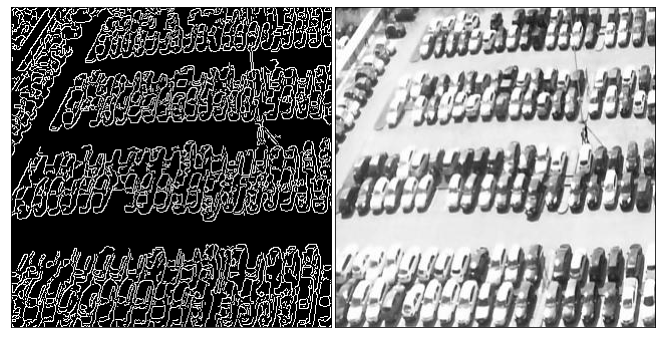

Upper PAI : 5230815


In [15]:
parkImg=cv2.imread("train/filled.jpg",0)
parkImg=parkImg[:320,:320]
edged = cv2.Canny(parkImg,10,150,apertureSize=3)
show_images([edged,parkImg])
upper=np.sum(edged)
print("Upper PAI : "+str(np.sum(edged)))

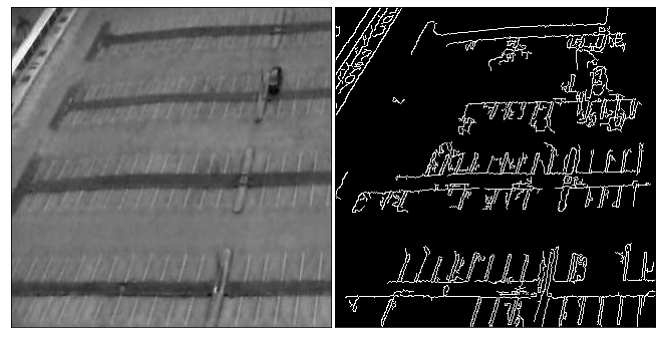

Lower PAI :2098395


In [16]:
parkImg=cv2.imread("train/empty.jpg",0)
parkImg=parkImg[:320,:320]
parkedged = cv2.Canny(parkImg,10,150,apertureSize=3)
show_images([parkImg,parkedged])
lower=np.sum(parkedged)
print("Lower PAI :"+str(np.sum(parkedged)))

In [17]:
parkImg.shape

(320, 320)

### Testing model

In [19]:
count=0
for i in range(75):
    image=cv2.imread("trail/trail"+str(i+1)+".jpg",0)
    image=image[:320,:320]
    image = cv2.GaussianBlur(image, (7,7), 0)
    edged = cv2.Canny(image,15,150,apertureSize=3)
    sumimg=np.sum(edged)
    if(sumimg>upper or sumimg<lower):
        print("Location of image recognised wrongly: "+"trail/trail"+str(i+1)+".jpg")
    if(sumimg>=lower and sumimg<=upper):
        count=count+1

"Number of correctly recognised out of 75: "+str(count)

Location of image recognised wrongly: trail/trail5.jpg
Location of image recognised wrongly: trail/trail6.jpg
Location of image recognised wrongly: trail/trail7.jpg
Location of image recognised wrongly: trail/trail50.jpg
Location of image recognised wrongly: trail/trail59.jpg
Location of image recognised wrongly: trail/trail60.jpg
Location of image recognised wrongly: trail/trail65.jpg


'Number of correctly recognised out of 75: 68'